# Importing and Tidying Data

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime
import datetime

In [2]:
# create array of dates to use for looping through Citibike's poorly named Index
relevant_datetimes = []
latest = datetime.date(2016, 12, 1)
current = datetime.date(2015, 3, 1)    

while current <= latest:
    relevant_datetimes.append(current)
    current += relativedelta(months=1)

#break up list of csvs into two for easier processing
batch1 = relevant_datetimes[:int(len(relevant_datetimes)/2)]
batch2 = relevant_datetimes[int(len(relevant_datetimes)/2):]

bike_trip_df1 = pd.DataFrame()

#combine all trip data CSVs
for dt in batch1:
    df = pd.read_csv('https://s3.amazonaws.com/tripdata/'+str(dt.year)+str(dt.month).zfill(2)+'-citibike-tripdata.zip', compression='zip', header=0, sep=',', quotechar='"')
    
    #conserve storage, change dtypes
    df['starttime'] = df['starttime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    df['stoptime'] = df['stoptime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    df['starttime'] = pd.to_datetime(df['starttime'], format = '%m/%d/%Y %H:%M:%S')
    df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%m/%d/%Y %H:%M:%S')
    df['usertype'] = df['usertype'].astype('category')
    
    bike_trip_df1 = bike_trip_df1.append(df)

In [4]:
print(bike_trip_df1.info())
print(bike_trip_df1.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964965 entries, 0 to 509477
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   category
birth year                 float64
gender                     int64
dtypes: category(1), datetime64[ns](2), float64(5), int64(5), object(2)
memory usage: 1.1+ GB
None
       tripduration  start station id  start station latitude  \
count  9.964965e+06      9.964965e+06            9.964965e+06   
mean   9.771970e+02      6.374628e+02            4.073601e+01   
std    7.778323e+03      7.639120e+02            2.056578e-02   
m

In [5]:
#write a conditional to check for string to datetime formatting
bike_trip_df2 = pd.DataFrame()
for dt in batch2:
    df = pd.read_csv('https://s3.amazonaws.com/tripdata/'+str(dt.year)+str(dt.month).zfill(2)+'-citibike-tripdata.zip', compression='zip', header=0, sep=',', quotechar='"')
    df.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
           'start station name', 'start station latitude',
           'start station longitude', 'end station id', 'end station name',
           'end station latitude', 'end station longitude', 'bikeid', 'usertype',
           'birth year', 'gender']  
#     df['starttime'] = df['starttime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
#     df['stoptime'] = df['stoptime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    if df['starttime'][0][4] == '-':
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%Y-%m-%d %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%Y-%m-%d %H:%M:%S')
    else:
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%m/%d/%Y %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%m/%d/%Y %H:%M:%S')
    df['usertype'] = df['usertype'].astype('category')
    bike_trip_df2 = bike_trip_df2.append(df)

In [6]:
print(bike_trip_df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13336177 entries, 0 to 812191
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   category
birth year                 float64
gender                     int64
dtypes: category(1), datetime64[ns](2), float64(5), int64(5), object(2)
memory usage: 1.5+ GB
None


In [7]:
relevant_datetimes = []
latest = datetime.date(2018, 1, 1)
current = datetime.date(2017, 1, 1)    

while current <= latest:
    relevant_datetimes.append(current)
    current += relativedelta(months=1)

#break up list of csvs into two for easier processing
batch3 = relevant_datetimes[:int(len(relevant_datetimes)/2)]
batch4 = relevant_datetimes[int(len(relevant_datetimes)/2):]

bike_trip_df3 = pd.DataFrame()

for dt in batch3:
    df = pd.read_csv('https://s3.amazonaws.com/tripdata/'+str(dt.year)+str(dt.month).zfill(2)+'-citibike-tripdata.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
    df.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']
    df['starttime'] = df['starttime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    df['stoptime'] = df['stoptime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    if df['starttime'][0][4] == '-':
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%Y-%m-%d %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%Y-%m-%d %H:%M:%S')
    else:
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%m/%d/%Y %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%m/%d/%Y %H:%M:%S')
    df['usertype'] = df['usertype'].astype('category')
    bike_trip_df3 = bike_trip_df3.append(df)

In [8]:
bike_trip_df4 = pd.DataFrame()
for dt in batch4:
    df = pd.read_csv('https://s3.amazonaws.com/tripdata/'+str(dt.year)+str(dt.month).zfill(2)+'-citibike-tripdata.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
    df.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']
    df['starttime'] = df['starttime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    df['stoptime'] = df['stoptime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    if df['starttime'][0][4] == '-':
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%Y-%m-%d %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%Y-%m-%d %H:%M:%S')
    else:
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%m/%d/%Y %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%m/%d/%Y %H:%M:%S')
    df['usertype'] = df['usertype'].astype('category')
    bike_trip_df4 = bike_trip_df4.append(df)

In [9]:
bike_trip_df = pd.concat([bike_trip_df1,bike_trip_df2,bike_trip_df3,bike_trip_df4])

In [10]:
bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40384783 entries, 0 to 718983
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   category
birth year                 float64
gender                     int64
dtypes: category(1), datetime64[ns](2), float64(5), int64(5), object(2)
memory usage: 4.6+ GB


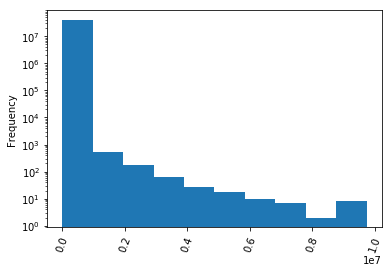

In [12]:
bike_trip_df['tripduration'].plot(kind='hist', rot=70, logy=True)
plt.show()
# bike_trip_df['tripduration'].sort_values()
# station_availability_df = station_availability_df[station_availability_df.avail_bikes <= 100]
# station_availability_df['avail_bikes'].plot(kind='hist', rot=70, logy=True)
# plt.show()